[View in Colaboratory](https://colab.research.google.com/github/sonukick/backtests/blob/master/Open_n_close.ipynb)

In [68]:
!pip install openpyxl
!pip install pydrive
!pip install quandl
!pip install pyfolio
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import seaborn as sns
import matplotlib.pyplot as plt
import pyfolio as pf

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_list = drive.ListFile({'q': "'1P1c2VCcaHquJC0Fp5yfeiZjgqwNZlBEb' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))
#data = drive.CreateFile({'id': '1O-6oCbmJ3vRKGbh7mL7GLWPtN6mNogkL'})
#data.GetContentFile('f_o.csv')
data = drive.CreateFile({'id': '1cqSAgTq8Q7a-YLDoEwW312aAxZHY3MuG'})
data.GetContentFile('nifty50.csv')

api_key = 'rEwesR5TKDXzjNe-7kfj'
quandl.ApiConfig.api_key = api_key
#from google.colab import files
#uploaded = files.upload()
#symbols = pd.read_csv(io.StringIO(uploaded['ind_nifty50list.csv'].decode('utf-8')))



title: NIFTY & BANKNIFTY IEOD Data from 1st Oct 2010 to 7th May 2018, id: 1vv6gXT5v3KpDkTKLipDnahi9Nb6O3Ogf
title: NIFTY & BANKNIFTY IEOD Data from 1st Oct 2010 to 7th May 2018.rar, id: 1BfVK1OWujkEs97FRUsmYTSdZO19Rzx1l
title: f_o.csv, id: 1O-6oCbmJ3vRKGbh7mL7GLWPtN6mNogkL
title: ind_nifty50list.csv, id: 1cqSAgTq8Q7a-YLDoEwW312aAxZHY3MuG


In [51]:
symbols = pd.read_csv('nifty50.csv')
symbols = symbols['Symbol']
symbols[0]
close_list = []
close_list.append(('Date','symbol','entry','exit','profit'))
entry = 0
exit = 0
returns = 0

for j in symbols:
  print(j)
  try:
    data = quandl.get('NSE/'+str(j), start_date='2012-01-1', end_date='2018-08-20')
  except:
    continue
  for i in range(len(data.Close)-1):
    if data.Open[i] == data.Low[i]:
      entry = data.Close[i]
      exit = data.Close[i+1]
      returns = (exit/entry)-1
      close_list.append((data.index[i],j,entry,exit,returns))
     
      
      

  
  
    


ADANIPORTS
ASIANPAINT
AXISBANK
BAJAJ-AUTO
BAJFINANCE
BAJAJFINSV
BPCL
BHARTIARTL
INFRATEL
CIPLA
COALINDIA
DRREDDY
EICHERMOT
GAIL
GRASIM
HCLTECH
HDFCBANK
HEROMOTOCO
HINDALCO
HINDPETRO
HINDUNILVR
HDFC
ITC
ICICIBANK
IBULHSGFIN
IOC
INDUSINDBK
INFY
KOTAKBANK
LT
LUPIN
M&M
MARUTI
NTPC
ONGC
POWERGRID
RELIANCE
SBIN
SUNPHARMA
TCS
TATAMOTORS
TATASTEEL
TECHM
TITAN
UPL
ULTRACEMCO
VEDL
WIPRO
YESBANK
ZEEL


In [52]:
df = pd.DataFrame(close_list)
df.columns = df.iloc[0]
df.drop([0],inplace = True)
df


,Date,symbol,entry,exit,profit
1,2012-02-02 00:00:00,ADANIPORTS,151,150.25,-0.00496689
2,2012-03-07 00:00:00,ADANIPORTS,145.25,135,-0.070568
3,2012-03-13 00:00:00,ADANIPORTS,131.1,135.75,0.0354691
4,2012-03-14 00:00:00,ADANIPORTS,135.75,132.05,-0.027256
5,2012-05-17 00:00:00,ADANIPORTS,113.8,111.7,-0.0184534
6,2012-05-25 00:00:00,ADANIPORTS,113.8,114.9,0.00966608
7,2012-06-06 00:00:00,ADANIPORTS,124.15,125.1,0.00765203
8,2012-06-22 00:00:00,ADANIPORTS,117.85,116.7,-0.00975817
9,2012-08-03 00:00:00,ADANIPORTS,121.55,124.05,0.0205677
10,2012-08-07 00:00:00,ADANIPORTS,122.75,124.3,0.0126273


In [0]:
dates  = list(set(df.Date))
returns_by_dates = []
for i in dates:
  returns_by_date = np.mean(df[df['Date']==i].profit)
  returns_by_dates.append((i,returns_by_date*100))
  

In [0]:
df_returns = pd.DataFrame(returns_by_dates)

In [55]:
df_returns = df_returns.sort_values(0)
df_returns.index = df_returns[0]
df_returns.drop(columns = [0],inplace=True)
(df_returns)

,1
0,
2012-01-02,3.607473
2012-01-03,-0.966091
2012-01-04,-0.121498
2012-01-05,-0.440502
2012-01-06,0.158543
2012-01-07,-0.041891
2012-01-09,1.349109
2012-01-10,0.719098
2012-01-11,0.225326


In [0]:
cum_ret = np.cumsum(df_returns)

In [56]:
df_returns.groupby(df_returns.index.year).sum()

,1
0,
2012,26.246484
2013,23.215867
2014,49.890550
2015,26.753179
2016,4.596207
2017,-5.320356
2018,8.283519


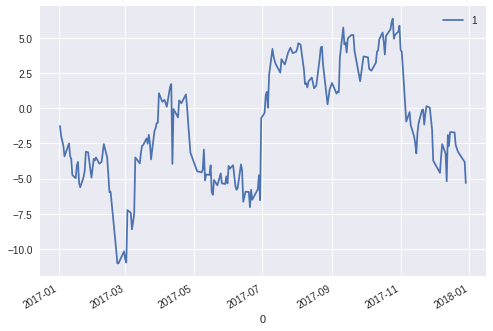

In [59]:
np.cumsum(df_returns[df_returns.index.year==2017]).plot()

In [65]:
df_returns[df_returns.index.year==2017].groupby(df_returns[df_returns.index.year==2017].index.month).sum()

,1
0,
1,-4.934072
2,-5.238489
3,11.233308
4,-4.212663
5,-2.193967
6,4.636726
7,4.704853
8,-2.622314
9,2.300335


In [0]:
stock_rets = df_returns[1]
